In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [13]:
temperatures = pd.read_csv('..\data\Average annual temperature central England 1723  1970.csv')
df = temperatures.set_index('temp').sort_index()
df.index = df.index.to_series().apply(lambda x: x + 1722)

In [14]:
df.head()

,x
temp,
1723,9.77
1724,9.27
1725,8.66
1726,9.34
1727,9.94


In [15]:
df.describe()

,x
count,248.000000
mean,9.216492
std,0.601082
min,6.840000
25%,8.840000
50%,9.220000
75%,9.610000
max,10.620000


In [16]:
df.head()

,x
temp,
1723,9.77
1724,9.27
1725,8.66
1726,9.34
1727,9.94


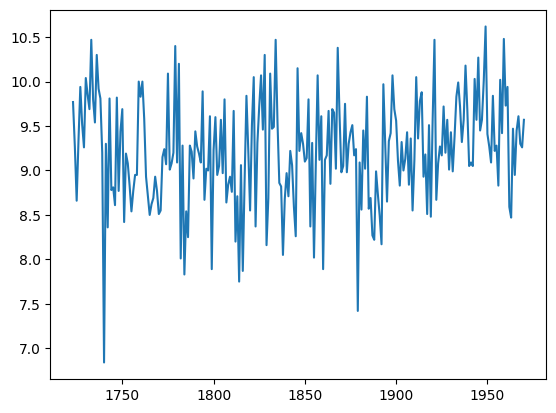

In [17]:
plt.plot(df["x"])

In [18]:
from statsmodels.tsa.stattools import adfuller

def dici_fuler(dataframe, name):
    alpha = 0.05

    print(f'Тест Дики-Фуллера ряда {name} :')
    dftest = adfuller(dataframe, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput["p-value"] < alpha:
        print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
    else:
        print(f"Значение p больше {alpha * 100}%. Ряд не стационарный.")

In [19]:
dici_fuler(df["x"], "Температура")

Тест Дики-Фуллера ряда Температура :
Test Statistic                -8.296696e+00
p-value                        4.121720e-13
#Lags Used                     1.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


In [20]:
nottrend = []
s = 6
notseason = []

for i in range(1, len(df["x"])):
    nottrend.append(df["x"][i] - df["x"][i-1])

for i in range(s, len(df["x"])):
    notseason.append(df["x"][i] - df["x"][i-s])

KeyError: 1

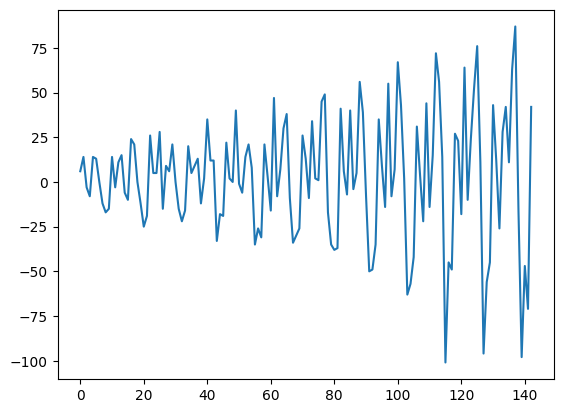

In [ ]:
plt.plot(nottrend)

In [ ]:
dici_fuler(nottrend, "Температура")

Тест Дики-Фуллера ряда Пассажиры :
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


In [ ]:
dici_fuler(notseason, "Температура")

Тест Дики-Фуллера ряда Пассажиры :
Test Statistic                  -3.154446
p-value                          0.022778
#Lags Used                       7.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


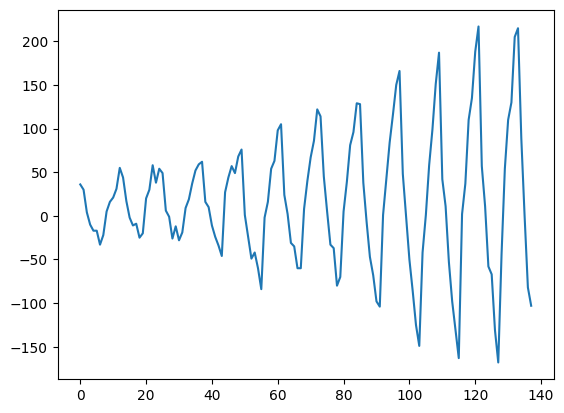

In [ ]:
plt.plot(notseason)

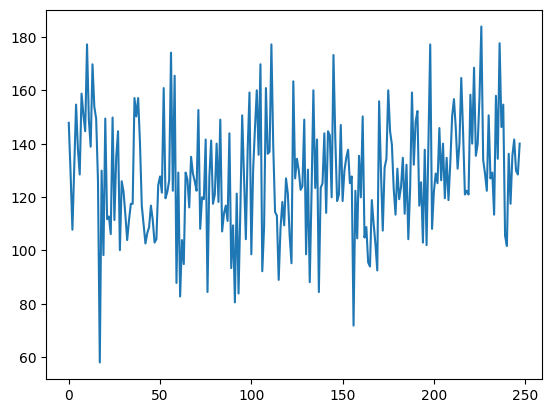

In [21]:
from scipy.stats import boxcox

transformed_data, best_lambda = boxcox(df["x"])
plt.plot(transformed_data)

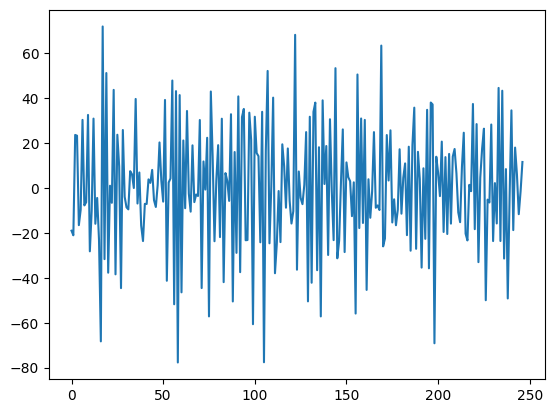

In [22]:
pnottrend = []
for i in range(1, len(transformed_data)):
    pnottrend.append(transformed_data[i] - transformed_data[i-1])

plt.plot(pnottrend)

In [23]:
dici_fuler(pnottrend, "Температура")

Тест Дики-Фуллера ряда Температура :
Test Statistic                -7.936752e+00
p-value                        3.397413e-12
#Lags Used                     1.300000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


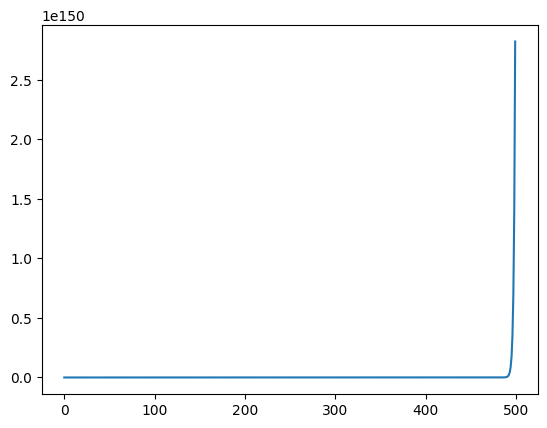

In [24]:
N = 500 

ar1 = [1]

for i in range(1, N):
    ar1.append(2 * ar1[i-1] + np.random.random())

plt.plot(ar1)

In [25]:
print(f"standart deviation = {np.std(ar1)}\nmean = {np.mean(ar1)}")

standart deviation = 1.452768505294635e+149
mean = 1.1287008423558535e+148


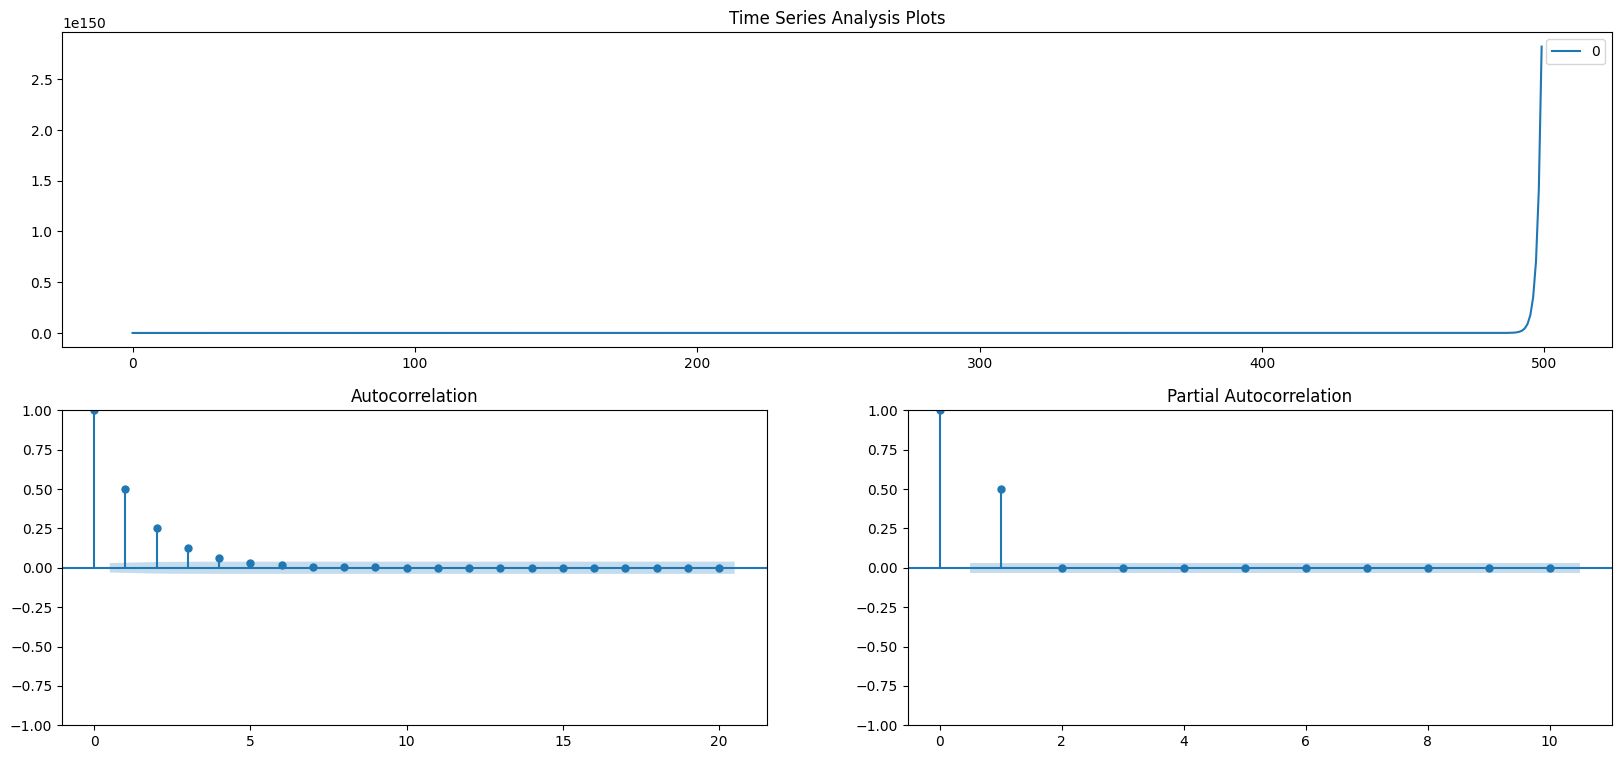

In [26]:
ts = pd.DataFrame(ar1)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax =plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None

In [33]:
df = pd.read_csv('..\data\Average annual temperature central England 1723  1970.csv', names = ["n", "x"], skiprows=1)

df['t'] = df.index.values
ln = len(df)

train_cutoff = int(round(ln * 0.75, 0))
validate_cutoff = int(round(ln * 0.90, 0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

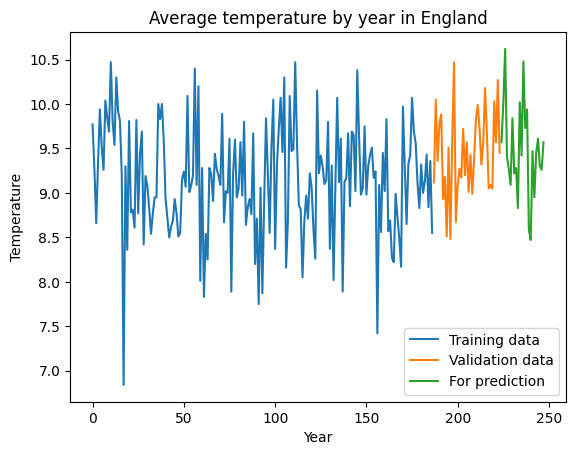

In [34]:
plt.plot(train_df.t, train_df.x, label="Training data")
plt.plot(validate_df.t, validate_df.x, label="Validation data")
plt.plot(forecast_df.t, forecast_df.x, label="For prediction")
plt.legend()
plt.title("Average temperature by year in England")
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show()

In [35]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

mod = AutoReg(df.t, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  248
Model:                     AutoReg(3)   Log Likelihood                6414.064
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Tue, 14 Nov 2023   AIC                         -12818.129
Time:                        22:52:22   BIC                         -12800.623
Sample:                             3   HQIC                        -12811.079
                                  248                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   4.39e-14   1.52e+13      0.000       0.667       0.667
t.L1           1.0000   4.37e-14   2.29e+13      0.000       1.000       1.000
t.L2           0.3333    3.1e-16   1.08e+15      0.0

In [36]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  248
Model:                     AutoReg(3)   Log Likelihood                6414.064
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Tue, 14 Nov 2023   AIC                         -12818.129
Time:                        22:52:25   BIC                         -12800.623
Sample:                             3   HQIC                        -12811.079
                                  248                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   2.77e-14   2.41e+13      0.000       0.667       0.667
t.L1           1.0000   2.74e-14   3.66e+13      0.000       1.000       1.000
t.L2           0.3333   3.44e-16   9.68e+14      0.0

In [37]:
sel = ar_select_order(df.x, 13, old_names=False)
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  248
Model:                     AutoReg(2)   Log Likelihood                -216.077
Method:               Conditional MLE   S.D. of innovations              0.582
Date:                Tue, 14 Nov 2023   AIC                            440.153
Time:                        22:52:29   BIC                            454.174
Sample:                             2   HQIC                           445.799
                                  248                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2669      0.752      8.338      0.000       4.794       7.740
x.L1           0.1189      0.062      1.903      0.057      -0.004       0.241
x.L2           0.2009      0.062      3.221      0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


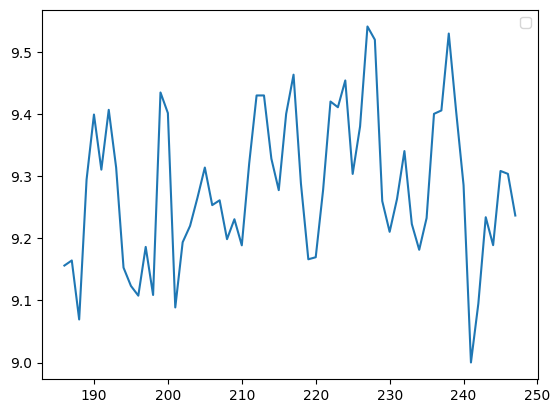

In [38]:
fig = res.plot_predict(train_cutoff)

In [39]:
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff + 1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t) - 1]), dynamic=False)

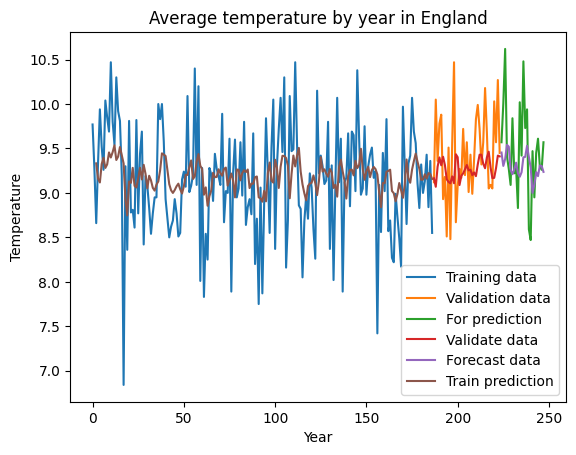

In [40]:
plt.plot(train_df.t, train_df.x, label="Training data")
plt.plot(validate_df.t, validate_df.x, label="Validation data")
plt.plot(forecast_df.t, forecast_df.x, label="For prediction")
plt.plot(validate_df.t, v_pred, label="Validate data")
plt.plot(forecast_df.t, f_pred, label="Forecast data")
plt.plot(train_df.t, pred, label="Train prediction")
plt.legend()
plt.title("Average temperature by year in England")
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show()

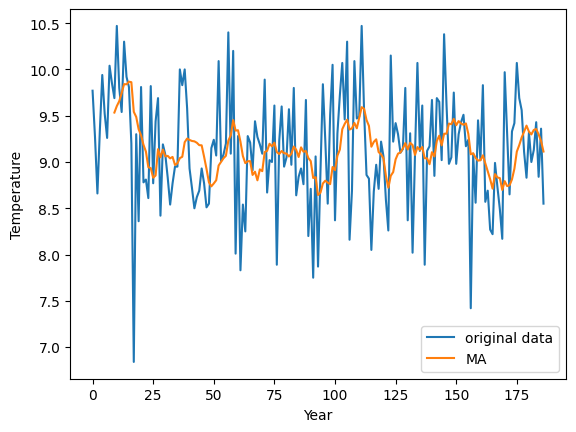

In [41]:
df['t'] = df.index.values

ln = len(df)

# указываем 'объемы' выборок
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# делим выборки
train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show()

In [50]:
def symmetric_mean_absolute_percentage_error(preds, target):
    return np.mean(np.abs(preds - target) / ((np.abs(target) + np.abs(preds)) / 2))

In [51]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2:", r2_score(forecast_df.x, f_pred))
print("SMAPE:", symmetric_mean_absolute_percentage_error(forecast_df.x, f_pred))

RMSE: 0.5321975842301102
MAPE: 0.04266086716885371
MAE: 0.41024911302469813
R2:  -0.09321686198918755
SMAPE:  0.043307859966754424
